In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [41]:
df = pd.read_csv(r"C:\Users\Aravind kumaran\Downloads\State-wise current sales of EV vehicles in various segments.csv")
df

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
0,Andaman and Nicobar Island,1,30.0,81,NaN,40.0,NaN,NaN,NaN,7.0,159
1,Arunachal Pradesh,14,NaN,5,NaN,NaN,NaN,NaN,NaN,1.0,20
2,Assam,721,47041.0,161,7.0,15.0,NaN,NaN,NaN,2.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,NaN,NaN,NaN,8.0,64241
4,Chandigarh,298,1410.0,182,NaN,40.0,NaN,NaN,NaN,1.0,1931
5,Chhattisgarh,6424,5341.0,117,1077.0,1.0,NaN,NaN,368.0,100.0,13428
6,Delhi,14730,112831.0,3051,49.0,39.0,NaN,NaN,NaN,1602.0,132302
7,Goa,1314,28.0,289,13.0,36.0,2.0,NaN,NaN,4.0,1686
8,Gujarat,13662,1869.0,1309,28.0,278.0,344.0,NaN,26.0,77.0,17593
9,Haryana,7777,18595.0,186,122.0,8.0,2.0,NaN,NaN,90.0,26780


In [3]:
df.shape

(33, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State Name                      33 non-null     object 
 1   Two Wheeler                     33 non-null     int64  
 2   Three Wheeler                   29 non-null     float64
 3   Four Wheeler                    33 non-null     int64  
 4   Goods Vehicles                  29 non-null     float64
 5   Public Service Vehicle          25 non-null     float64
 6   Special Category Vehicles       10 non-null     float64
 7   Ambulance/Hearses               6 non-null      float64
 8   Construction Equipment Vehicle  6 non-null      float64
 9   Other                           29 non-null     float64
 10  Grand Total                     33 non-null     int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 3.0+ KB


In [5]:
df.isnull().sum()

State Name                         0
Two Wheeler                        0
Three Wheeler                      4
Four Wheeler                       0
Goods Vehicles                     4
Public Service Vehicle             8
Special Category Vehicles         23
Ambulance/Hearses                 27
Construction Equipment Vehicle    27
Other                              4
Grand Total                        0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Two Wheeler,33.0,17123.757576,49890.139178,1.0,69.0,2540.0,10329.00,282542.0
Three Wheeler,29.0,44633.517241,126709.405409,1.0,167.0,4470.0,22096.00,647186.0
Four Wheeler,33.0,1596.060606,4732.596387,2.0,14.0,139.0,709.00,26335.0
Goods Vehicles,29.0,209.379310,621.003129,1.0,3.0,21.0,43.00,3036.0
Public Service Vehicle,25.0,163.120000,429.671611,1.0,10.0,36.0,44.00,2039.0
Special Category Vehicles,10.0,82.000000,156.546053,1.0,2.0,4.5,25.75,410.0
Ambulance/Hearses,6.0,2.000000,2.000000,1.0,1.0,1.0,1.75,6.0
Construction Equipment Vehicle,6.0,132.333333,194.236625,1.0,1.0,13.5,282.50,397.0
Other,29.0,304.275862,882.324847,1.0,4.0,21.0,77.00,4412.0
Grand Total,33.0,58567.454545,171480.920922,20.0,1527.0,12171.0,47947.00,966363.0


In [7]:
l=['Special Category Vehicles','Ambulance/Hearses','Construction Equipment Vehicle','Other']
for i in l:
    print(i)
    print(df[i].value_counts())
    print('---------------------------------------------------------------')

Special Category Vehicles
2.0      3
1.0      2
344.0    1
26.0     1
25.0     1
7.0      1
410.0    1
Name: Special Category Vehicles, dtype: int64
---------------------------------------------------------------
Ambulance/Hearses
1.0    4
2.0    1
6.0    1
Name: Ambulance/Hearses, dtype: int64
---------------------------------------------------------------
Construction Equipment Vehicle
1.0      3
368.0    1
26.0     1
397.0    1
Name: Construction Equipment Vehicle, dtype: int64
---------------------------------------------------------------
Other
1.0       5
8.0       2
21.0      2
7.0       1
601.0     1
61.0      1
13.0      1
193.0     1
9.0       1
24.0      1
23.0      1
3.0       1
1420.0    1
17.0      1
57.0      1
46.0      1
90.0      1
77.0      1
4.0       1
1602.0    1
100.0     1
2.0       1
4412.0    1
Name: Other, dtype: int64
---------------------------------------------------------------


These columns have similar values since we are focusing on family vehicles like cars and bikes .therefore we can remove it 

In [8]:
df.drop(['Special Category Vehicles','Ambulance/Hearses','Construction Equipment Vehicle','Other'],axis=1,inplace=True)

In [9]:
df.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Grand Total
0,Andaman and Nicobar Island,1,30.0,81,NaN,40.0,159
1,Arunachal Pradesh,14,NaN,5,NaN,NaN,20
2,Assam,721,47041.0,161,7.0,15.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,64241
4,Chandigarh,298,1410.0,182,NaN,40.0,1931


Here we dont need any grand total we can drop the total column

In [10]:
df.drop('Grand Total',axis=True,inplace=True)

In [11]:
df.isnull().sum()

State Name                0
Two Wheeler               0
Three Wheeler             4
Four Wheeler              0
Goods Vehicles            4
Public Service Vehicle    8
dtype: int64

In [12]:
df

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle
0,Andaman and Nicobar Island,1,30.0,81,NaN,40.0
1,Arunachal Pradesh,14,NaN,5,NaN,NaN
2,Assam,721,47041.0,161,7.0,15.0
3,Bihar,5003,59079.0,114,11.0,26.0
4,Chandigarh,298,1410.0,182,NaN,40.0
5,Chhattisgarh,6424,5341.0,117,1077.0,1.0
6,Delhi,14730,112831.0,3051,49.0,39.0
7,Goa,1314,28.0,289,13.0,36.0
8,Gujarat,13662,1869.0,1309,28.0,278.0
9,Haryana,7777,18595.0,186,122.0,8.0


filling the missing numerical values with median to get the clean data .

In [13]:
 numerical_columns_with_missing = ['Three Wheeler', 'Goods Vehicles', 'Public Service Vehicle']

# Fill missing values with the median for each numerical column
for column in numerical_columns_with_missing:
    median_value = df[column].median()  # Calculate median for the column
    df[column].fillna(median_value, inplace=True)


In [14]:
df

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle
0,Andaman and Nicobar Island,1,30.0,81,21.0,40.0
1,Arunachal Pradesh,14,4470.0,5,21.0,36.0
2,Assam,721,47041.0,161,7.0,15.0
3,Bihar,5003,59079.0,114,11.0,26.0
4,Chandigarh,298,1410.0,182,21.0,40.0
5,Chhattisgarh,6424,5341.0,117,1077.0,1.0
6,Delhi,14730,112831.0,3051,49.0,39.0
7,Goa,1314,28.0,289,13.0,36.0
8,Gujarat,13662,1869.0,1309,28.0,278.0
9,Haryana,7777,18595.0,186,122.0,8.0


C:\Users\Aravind kumaran\AppData\Local\Temp\ipykernel_1008\2871163170.py:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.median())


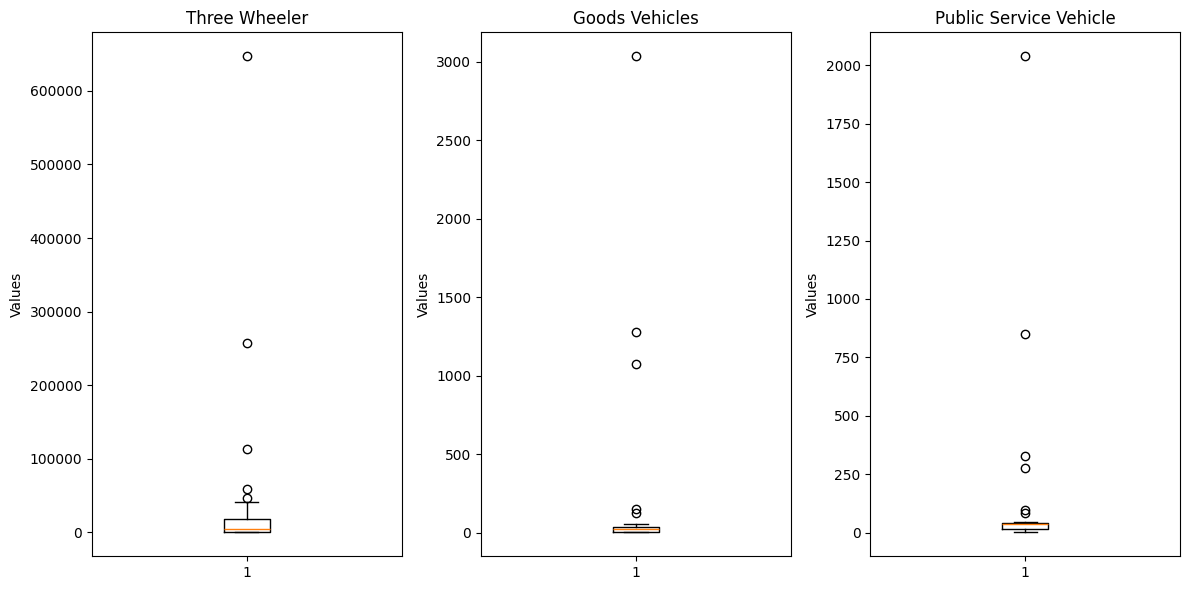

In [15]:
import matplotlib.pyplot as plt

# Fill missing values with median for each column
df_filled = df.fillna(df.median())

# List of columns to visualize
columns_to_visualize = ['Three Wheeler', 'Goods Vehicles', 'Public Service Vehicle']

# Plot boxplots for each column
plt.figure(figsize=(12, 6))

# Iterate over columns to visualize
for i, column in enumerate(columns_to_visualize, start=1):
    plt.subplot(1, 3, i)
    plt.boxplot(df_filled[column])
    plt.title(column)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()


In [16]:
df.isnull().sum()

State Name                0
Two Wheeler               0
Three Wheeler             0
Four Wheeler              0
Goods Vehicles            0
Public Service Vehicle    0
dtype: int64

In [17]:
df.columns

Index(['State Name', 'Two Wheeler', 'Three Wheeler', 'Four Wheeler',
       'Goods Vehicles', 'Public Service Vehicle'],
      dtype='object')

In [18]:
df.describe()

,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle
count,33.000000,33.000000,33.000000,33.000000,33.000000
mean,17123.757576,39765.212121,1596.060606,186.545455,132.303030
std,49890.139178,119270.959266,4732.596387,584.240912,376.196465
min,1.000000,1.000000,2.000000,1.000000,1.000000
25%,69.000000,443.000000,14.000000,6.000000,15.000000
50%,2540.000000,4470.000000,139.000000,21.000000,36.000000
75%,10329.000000,18595.000000,709.000000,35.000000,40.000000
max,282542.000000,647186.000000,26335.000000,3036.000000,2039.000000


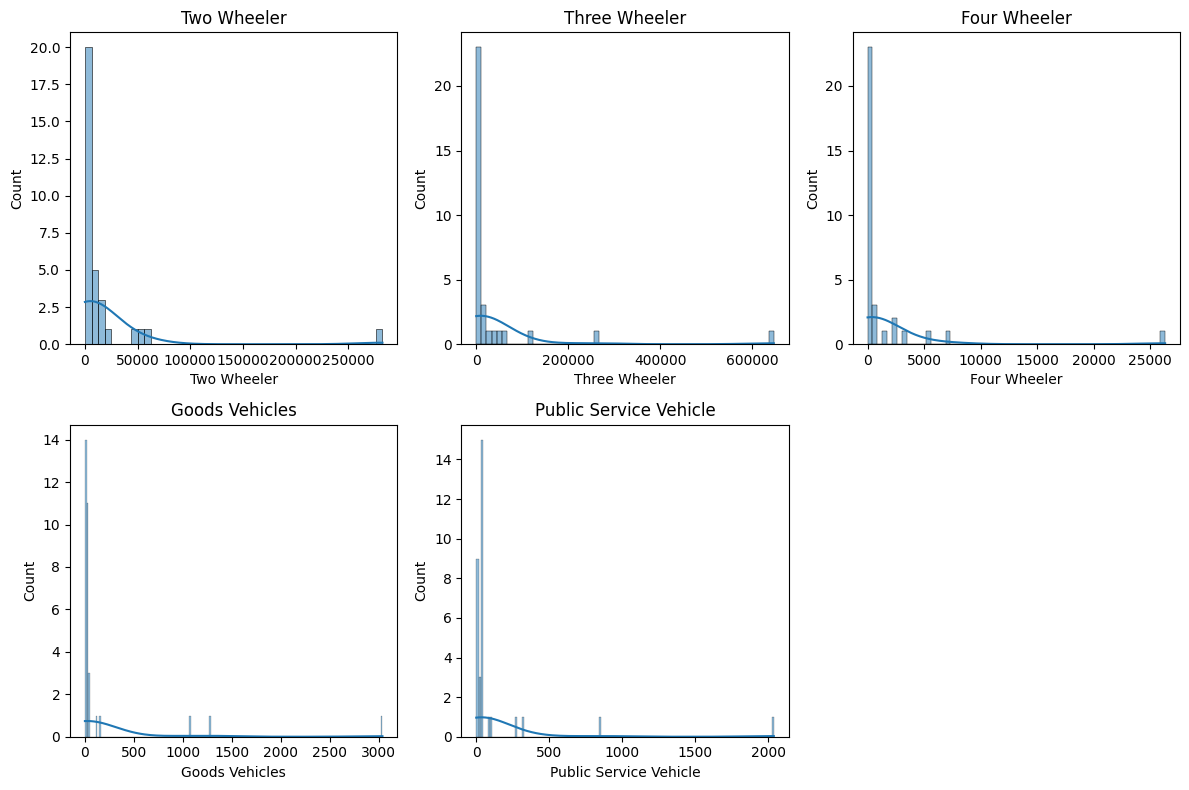

Skewness of the numerical variables:
Two Wheeler               5.017469
Three Wheeler             4.579359
Four Wheeler              4.801783
Goods Vehicles            4.172617
Public Service Vehicle    4.547734
dtype: float64


In [19]:
numerical_columns = ['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles', 'Public Service Vehicle']

# Visualize the distribution of each numerical variable using histograms
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# Check the skewness of each numerical variable
skewness = df[numerical_columns].skew()
print("Skewness of the numerical variables:")
print(skewness)

Therefore our data is right skewed making a log transformation

In [39]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')
df_log_transformed = df_numeric.apply(lambda x: np.log(x) if np.min(x) > 0 else np.log(x + 1))
df_log_transformed
df_numeric


,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle
0,NaN,1,30.0,81,21.0,40.0
1,NaN,14,4470.0,5,21.0,36.0
2,NaN,721,47041.0,161,7.0,15.0
3,NaN,5003,59079.0,114,11.0,26.0
4,NaN,298,1410.0,182,21.0,40.0
5,NaN,6424,5341.0,117,1077.0,1.0
6,NaN,14730,112831.0,3051,49.0,39.0
7,NaN,1314,28.0,289,13.0,36.0
8,NaN,13662,1869.0,1309,28.0,278.0
9,NaN,7777,18595.0,186,122.0,8.0


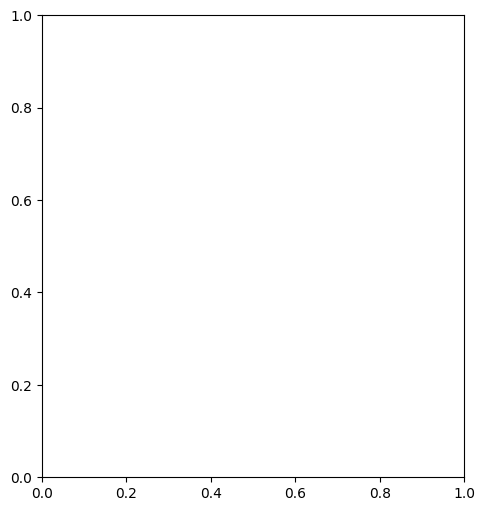

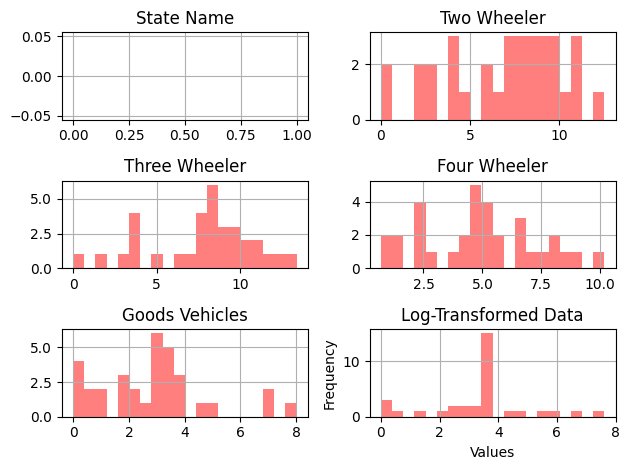

In [21]:
plt.figure(figsize=(12, 6))


# Transformed data
plt.subplot(1, 2, 2)
df_log_transformed.hist(alpha=0.5, color='red', bins=20)
plt.title('Log-Transformed Data')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [22]:
categorical_columns = ['State Name']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(df[categorical_columns])
encoded_column_names = encoder.get_feature_names_out(categorical_columns)
df_encoded = pd.DataFrame(encoded_data, columns=encoded_column_names)
df_encoded = pd.concat([df.drop(categorical_columns, axis=1), df_encoded], axis=1)
df_encoded

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,State Name_Arunachal Pradesh,State Name_Assam,State Name_Bihar,State Name_Chandigarh,State Name_Chhattisgarh,...,State Name_Odisha,State Name_Puducherry,State Name_Punjab,State Name_Rajasthan,State Name_Sikkim,State Name_Tamil Nadu,State Name_Tripura,State Name_Uttar Pradesh,State Name_Uttarakhand,State Name_West Bengal
0,1,30.0,81,21.0,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14,4470.0,5,21.0,36.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,721,47041.0,161,7.0,15.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5003,59079.0,114,11.0,26.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,298,1410.0,182,21.0,40.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6424,5341.0,117,1077.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,14730,112831.0,3051,49.0,39.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1314,28.0,289,13.0,36.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,13662,1869.0,1309,28.0,278.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,7777,18595.0,186,122.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Split the data to X and  Y variables

In [32]:
X = df_encoded.drop('Goods Vehicles', axis=1)  # Use 'Goods Vehicles' as the target variable
y = df_encoded['Goods Vehicles']


Applying Log Transformation to the Target Variable

In [33]:
y_log = np.log1p(y)

Split the tranformed target variable

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)


Train the model for the x_test and y_test.

In [35]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_original_scale = np.expm1(y_pred)  # Inverse of log1p() is expm1()
mse = mean_squared_error(np.expm1(y_test), y_pred_original_scale)  # Convert test target to original scale for evaluation
rmse = np.sqrt(mse)
print("Root Mean Squared Error (Original Scale):", rmse)


Root Mean Squared Error (Original Scale): 473.1266909600792


* The Root Mean Squared Error (RMSE) of 473.13 indicates the average deviation of the predicted values from the actual values (in the original scale) of the target variable.

* The RMSE measures the average magnitude of the errors between predicted and actual values.
Since the RMSE is relatively low (473.13), it suggests that, on average, the model's predictions are close to the actual values of the target variable.
In the context of your specific problem, a low RMSE of 473.13 is indicative of good predictive performance.
Lower RMSE values indicate better predictive performance, so in this case, the model appears to be performing well in terms of prediction accuracy.
However, it's essential to consider other evaluation metrics and domain knowledge to comprehensively assess the model's performance.